<a href="https://colab.research.google.com/github/shraishwarya/Image-Classification-using-a-Dense-Neural-Network/blob/main/Image_Classification_using_Dense_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

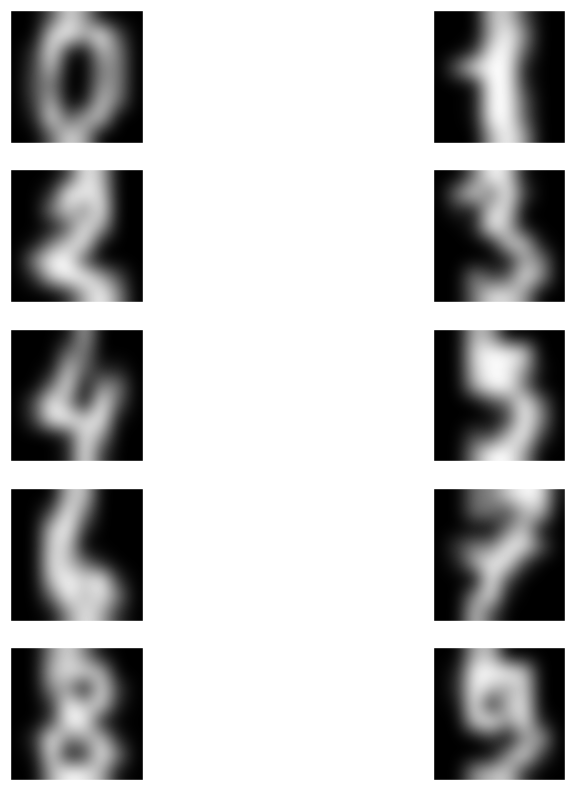

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2864 - loss: 3.2743 - val_accuracy: 0.8120 - val_loss: 0.6215
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8532 - loss: 0.5648 - val_accuracy: 0.9316 - val_loss: 0.2550
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9118 - loss: 0.2753 - val_accuracy: 0.9402 - val_loss: 0.1461
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9614 - loss: 0.1681 - val_accuracy: 0.9487 - val_loss: 0.1275
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9685 - loss: 0.1024 - val_accuracy: 0.9487 - val_loss: 0.1267
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9733 - loss: 0.0922 - val_accuracy: 0.9402 - val_loss: 0.1168
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9910 - loss: 0.0430 - val_accuracy: 0.9658 - val_loss: 0.0873
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9942 - loss: 0.0309 - val_accuracy: 0.9658 - val_loss

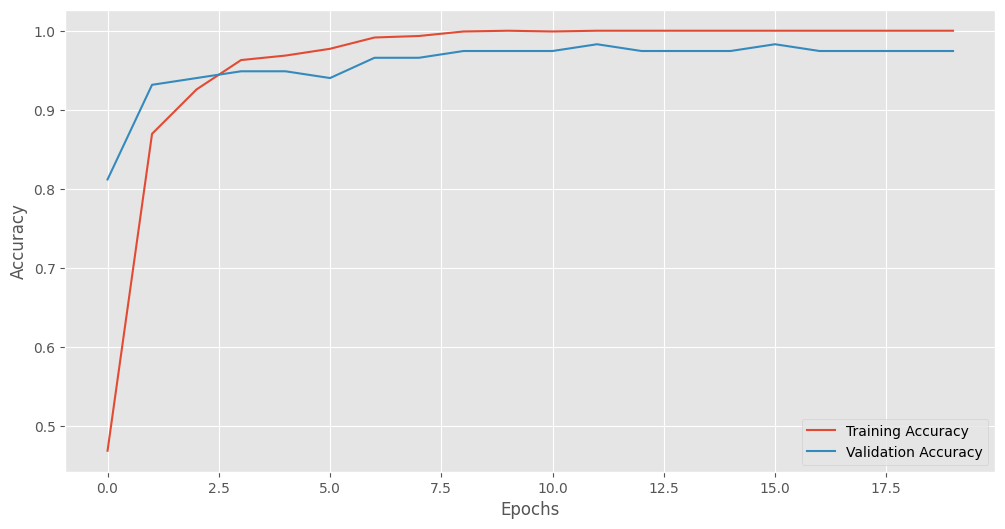

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


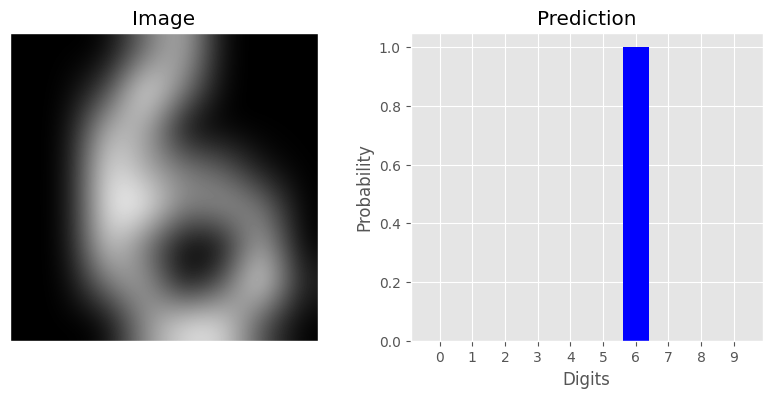

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


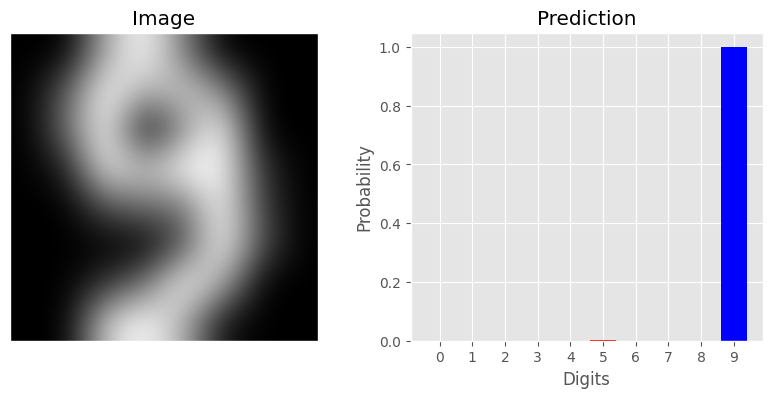

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


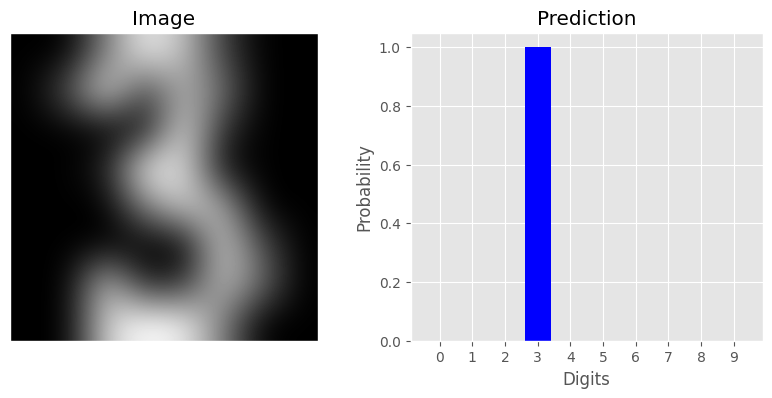

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


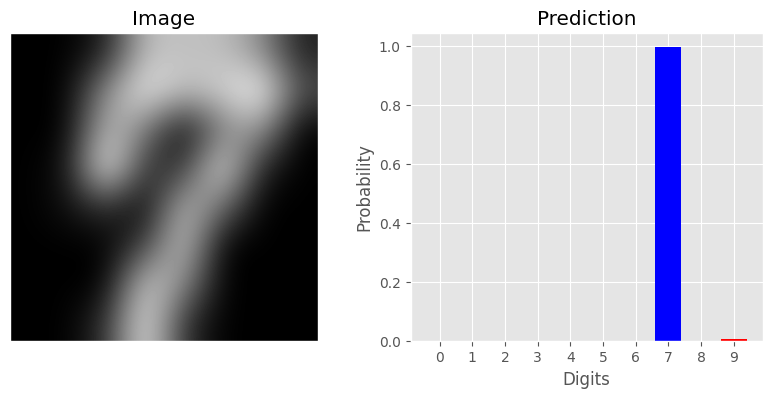

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


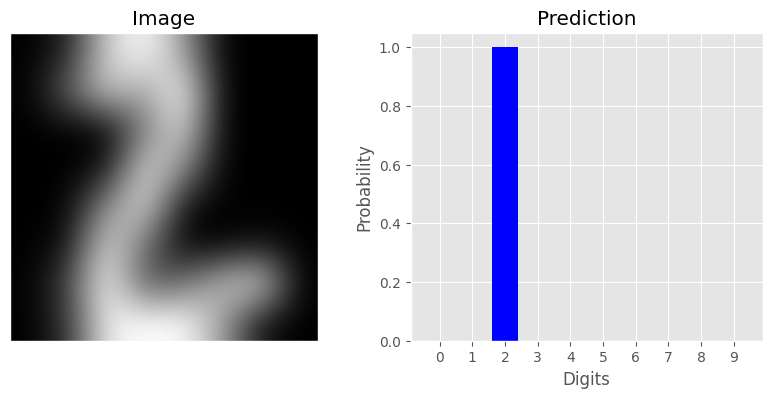

In [ ]:
# Import data and Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical

# Load data
data = load_digits()
df = data.images
target = data.target

# Data visualization
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(df[i], cmap="gray", interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
plt.show()

# Classification
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Split data for train and test
X = df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
w, h = df[0].shape
X_train = X_train.reshape(len(X_train), w * h)
X_test = X_test.reshape(len(X_test), w * h)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Function for predictions
def Prediction_cat(model, image):
    pred = model.predict(image)
    color = ["red"] * 10
    num = pred.argmax()
    color[num] = "blue"
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image.reshape(w, h), cmap="gray", interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    plt.title("Image")
    plt.subplot(1, 2, 2)
    plt.bar(x=range(10), height=pred.flatten(), color=color)
    plt.xlabel("Digits")
    plt.ylabel("Probability")
    plt.title("Prediction")
    plt.xticks(range(10))
    plt.show()

# Model
model = Sequential()
model.add(Dense(64, input_shape=(w * h,), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Training the model
history = model.fit(X_train, y_train_cat, batch_size=32, epochs=20, validation_split=0.1)

# Result
result = model.evaluate(X_test, y_test_cat)
for metric_name, value in zip(model.metrics_names, result):
    print(f"{metric_name}: {value}")

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Testing predictions
for i in range(5):
    Prediction_cat(model, X_test[i].reshape(1, -1))
